## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`


These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [14]:
%pip install transformers

     ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
     --- ------------------------------------ 10.2/129.4 kB ? eta -:--:--
     -------- ---------------------------- 30.7/129.4 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ---- 112.6/129.4 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 129.4/129.4 kB 850.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.4 MB 11.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.4 MB 14.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.4 MB 19.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.5/8.4 MB 20.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.4/8.4 MB 19.9 MB/s eta 0:00:01
   ----

In [1]:
import pandas as pd

url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)



<Axes: xlabel='category', ylabel='count'>

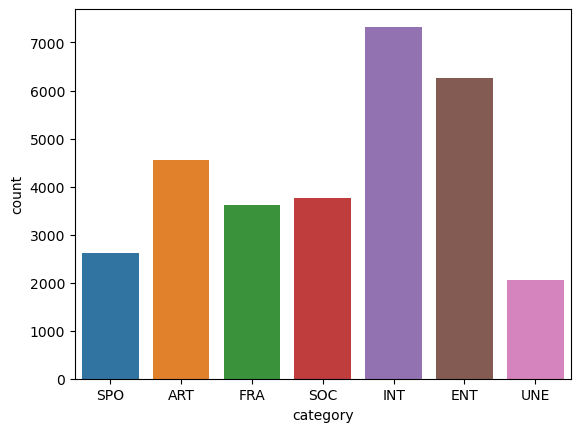

In [2]:
import seaborn as sns
%matplotlib inline

sns.countplot(df,x= 'category')


In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
df.sample(3)



,text,category
29121,les mesures de renforcement de la vidéosurveillance dans les lieux publics prévues dans le projet de loi feront forcément débat notamment du côté de la commission nationale de l'informatique et des libertés cnil qui n'a pas été consultée le texte envisage de permettre aux forces de l'ordre d ' accéder le cas échéant en temps réel aux images recueillies sur la voie publique par les systèmes de vidéosurveillance cela signifie-t-il que les policiers auraient un accès permanent et direct à ces caméras au même titre que les opérateurs ou bien agiraient-ils sur demande d'un officier de police judiciaire dans le cadre d'une procédure a lyon par exemple des agents civils scrutent les images des 58 caméras installées dans la ville puis alertent la police selon le ministère de l'intérieur les policiers ne consulteraient les données vidéo qu'après avoir reçu une autorisation d'accès dans le cadre d'une enquête préliminaire ou d'une enquête administrative la finalité de la vidéosurveillance est aussi un enjeu s'agit-il d'une mesure de dissuasion d'un outil d'enquête après un acte délictuel ou bien permettrait-elle également de créer un fichier nominatif dès lors qu'il est possible d'identifier les gens en angleterre la police de manchester envisage de recourir à des techniques de reconnaissance faciale pour repérer les hooligans autre mesure prévue dans le document de travail donner un cadre juridique aux installations de vidéosurveillance dans les parties communes privées d'habitation et rendre obligatoire l'installation d'une vidéosurveillance dans les garages et parcs de stationnement de plus de 200 places les copropriétaires seront également intéressés d'apprendre que le texte envisage de faire passer le vote d'un investissement de sécurité de la majorité des deux tiers à la majorité simple ce recours à la vidéosurveillance outre les questions qu'il pourrait soulever chez les défenseurs des libertés individuelles ne va pas de soi du point de vue de son efficacité dans la lutte contre la délinquance les chercheurs eric heilmann et marie-noëlle mornet ont conduit une étude pour l'institut des hautes études de la sécurité intérieure ihesi sur l'impact de la vidéosurveillance sur la criminalité en grande-bretagne très en avance dans ce domaine conclusion si on établit un parallèle entre le montant des investissements consentis ... et le nombre d'arrestations opérées par les agents sur le terrain la question de l'efficacité de la vidéosurveillance exige une réponse dénuée de toute ambiguïté l'aide apportée par les caméras à l'identification et à l'arrestation de suspects est négligeable les auteurs de cette étude publiée en avril ajoutent que l'installation de caméras s'accompagne souvent d'un phénomène de déplacement géographique ou fonctionnel de la criminalité,FRA
12895,le trafic des transports en commun était perturbé lundi dans l'agglomération lyonnaise par un mouvement de grève des agents de la société lyonnaise des transports en commun sltc seulement 40 des bus circulaient et 75 des rames de tramway cette grève des agents de la sltc protestant contre certaines mesures disciplinaires,ENT
6373,le tribunal de grande instance de paris a ordonné lundi 26 mai à la droite libre une association d'adhérents de l'ump de cesser d'appeler à une manifestation électronique consistant à bloquer les boîtes électroniques de plusieurs syndicats le juge a condamné l'association à verser 400 euros de dommages et intérêts aux plaignants le snes le snu-anpe et l'unsa,FRA


C:\Users\leopo\AppData\Local\Temp\ipykernel_20028\2724423554.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


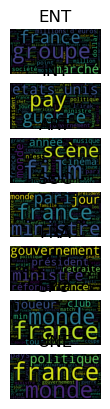

In [16]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7)

df['text'].str.cat(sep=' ')

# plot a word cloud for each category
for i,cat in enumerate(['ENT', 'INT',  'ART', 'SOC', 'FRA','SPO','UNE']):
    total_text = df[df["category"]==cat].text.str.cat(sep=' ')

    wc = WordCloud(stopwords = STOPWORDS).generate(total_text)
    
    axs[i].imshow(wc)
    axs[i].axis('off')
    axs[i].set_title(cat)

fig.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:


> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [7]:
from sklearn.model_selection import train_test_split

seed = 42

# Split the dataset, create X (features) and y (target), print the size
X = df.text

Y = df.category

# Assuming X is your features and y is your labels


# Split the data into training and temp data sets (80% train, 20% temp)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=seed)

# Split the temp data set equally into test and dev sets (10% test, 10% dev)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)

# Now you have:


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_dev_counts = vectorizer.transform(X_dev)


In [9]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_counts,Y_train) # pas besoin de onehotencoder ?
# Evaluate 
clf.score(X_test_counts,Y_test)


0.7141909814323607

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)


from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# create the MultinomialNB
clf = MultinomialNB().fit(X_train_tf,Y_train)

# Evaluate 
clf.score(X_test_tf,Y_test)

# légèrement mieux

0.7314323607427056

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Classification Report:
               precision    recall  f1-score   support

         ART       0.73      0.85      0.79       453
         ENT       0.74      0.84      0.79       603
         FRA       0.64      0.67      0.65       380
         INT       0.75      0.88      0.81       741
         SOC       0.64      0.55      0.59       377
         SPO       0.92      0.75      0.82       270
         UNE       0.00      0.00      0.00       192

    accuracy                           0.73      3016
   macro avg       0.63      0.65      0.64      3016
weighted avg       0.69      0.73      0.70      3016



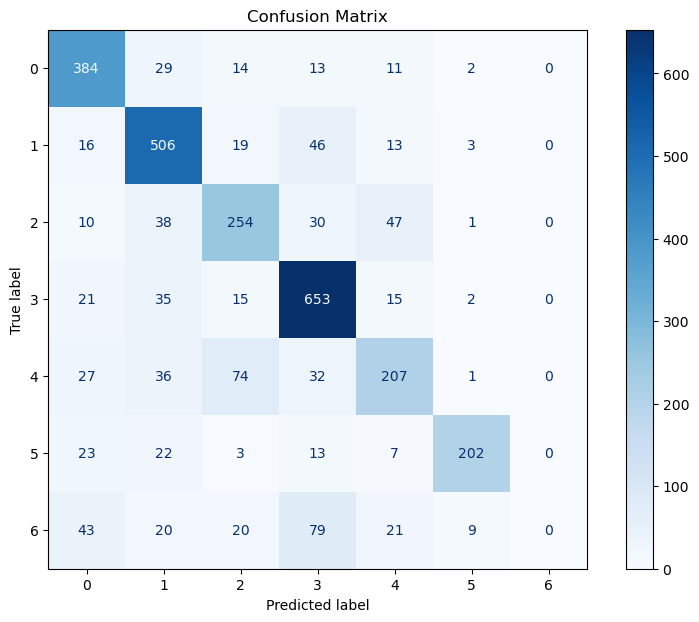

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Assuming clf is your trained MultinomialNB classifier
# And X_test_tf, Y_test are your test features and labels

# Generate the classification report
report = classification_report(Y_test, clf.predict(X_test_tf), zero_division = 0)
print("Classification Report:\n", report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, clf.predict(X_test_tf))
#print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

0.8263963002490217
Classification Report:
               precision    recall  f1-score   support

         ART       0.83      0.88      0.86       457
         ENT       0.81      0.82      0.81       630
      FRASOC       0.76      0.86      0.81       718
         INT       0.88      0.82      0.85       787
         SPO       0.98      0.66      0.79       219

    accuracy                           0.83      2811
   macro avg       0.85      0.81      0.82      2811
weighted avg       0.83      0.83      0.83      2811



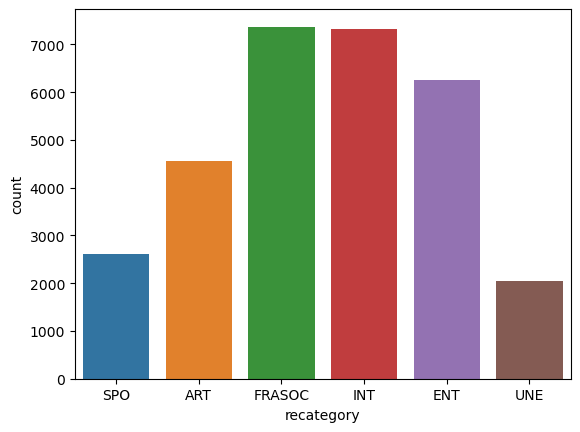

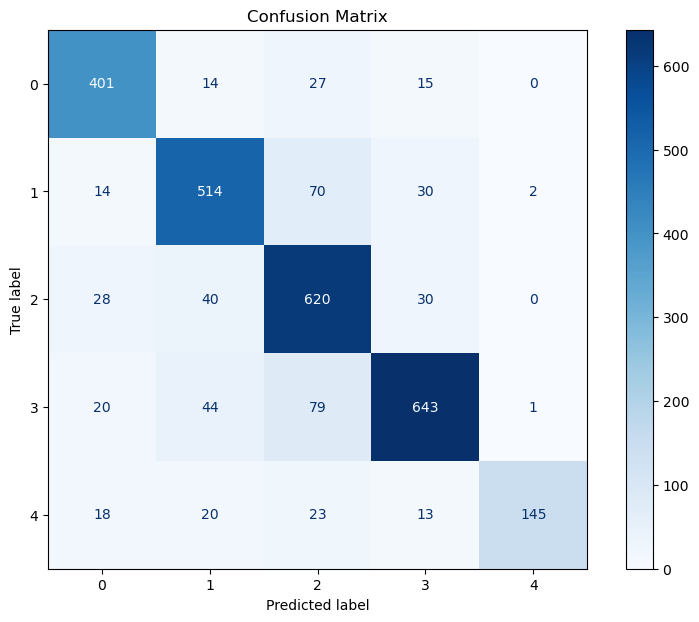

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Filter out the UNE class

def recat(cat):
    if(cat=="FRA" or cat == "SOC"):
        return "FRASOC"
    return cat
df["recategory"] = df.category.apply(recat)
# Plot the statistics of classes
sns.countplot(df,x= 'recategory')
# Make the splits and print the sizes for checking
from sklearn.model_selection import train_test_split
seed = 42
X = df[df.recategory!="UNE"].text
Y = df[df.recategory!="UNE"].recategory
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=seed)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)

# Vectorize
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_dev_counts = vectorizer.transform(X_dev)

# Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

# Train MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf,Y_train)

# Print accuracy
print(clf.score(X_test_tf,Y_test))

# Print confusion matric
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

report = classification_report(Y_test, clf.predict(X_test_tf), zero_division = 0)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(Y_test, clf.predict(X_test_tf), labels = clf.classes_)
#print("Confusion Matrix:\n", conf_matrix)

fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = clf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:


* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

## Responses

### Model choice

I want to use a model based on camemBERT which is a reference for text classification for french language. 
I found two of them :
- cmarkea/distilcamembert-base-nli
- mtheo/camembert-base-xnli
As the first one is not working, I went with the second one.

In [13]:
import pandas as pd

url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)

df = df[df["category"]!="UNE"]

semantic_categories = {
    "ENT":"marché", # d'autres essais comme économie et entreprise ont été essayé mais était très mal classifié
    "INT":"international", # géopolitique a aussi été testé
    "ART":"culture", # art a aussi été essayé avec un résultat moyen
    "SPO":"sport",
    "FRA":"politique française",
    "SOC":"politique française"
}

df["semantic_categories"] = df["category"].apply(lambda x: semantic_categories[x])

list_semantic_categories = df["semantic_categories"].unique()

df.keys()


Index(['text', 'category', 'semantic_categories'], dtype='object')

On transforme les labels très simplifiés en des mots qui ont du sens (en se basant par exemple sur les wordclouds de chacun des catégories). On a éliminé UNE car c'est une catégorie qui a priori mélange sémantiquement les autres catégories comme la classification naïve l'a mis en évidence.

### Prédiction sur un example

In [14]:
from transformers import pipeline

model_name = "mtheo/camembert-base-xnli"

classifier = pipeline(
    task='zero-shot-classification',
    model=model_name,
    tokenizer=model_name
)

example = df.sample(1, random_state=42).iloc[0].to_dict()

example['zero-shot'] = classifier(example['text'],candidate_labels=list_semantic_categories, hypothesis_template="Cet article parle de {}.")

print(f"""Example subject : {example['semantic_categories']}.
Results pref labels : {example['zero-shot']['labels']},
Results pref scores : {example['zero-shot']['scores']}""")

Example subject : sport.
Results pref labels : ['sport', 'marché', 'international', 'culture', 'politique française'],
Results pref scores : [0.2985265254974365, 0.23243020474910736, 0.19910624623298645, 0.17849726974964142, 0.09143971651792526]


the result seems okay : sport is the label with the best score. We can compare it to facebook/bart-large-mnli model.

In [15]:
from transformers import pipeline

model_name = "facebook/bart-large-mnli"

classifier = pipeline(
    task='zero-shot-classification',
    model=model_name,
    tokenizer=model_name
)

example = df.sample(1, random_state=42).iloc[0].to_dict()

example['zero-shot'] = classifier(example['text'],candidate_labels=list_semantic_categories, hypothesis_template="Cet article parle de {}.")

print(f"""Example subject : {example['semantic_categories']}.
Results pref labels : {example['zero-shot']['labels']},
Results pref scores : {example['zero-shot']['scores']}""")

Example subject : sport.
Results pref labels : ['marché', 'culture', 'international', 'sport', 'politique française'],
Results pref scores : [0.3285931944847107, 0.2402038425207138, 0.21028193831443787, 0.12067753821611404, 0.10024350136518478]


We clearly see that the not specific french model is not good enough for our task : sport is the label with the worst score.

We can also test the importance of the hypothesis template :

In [16]:
from transformers import pipeline

# model_name = "facebook/bart-large-mnli"

model_name = "mtheo/camembert-base-xnli"

classifier = pipeline(
    task='zero-shot-classification',
    model=model_name,
    tokenizer=model_name
)

example = df.sample(1, random_state=42).iloc[0].to_dict()

example['zero-shot'] = classifier(example['text'],candidate_labels=list_semantic_categories)

print(f"""Example subject : {example['semantic_categories']}.
Results pref labels : {example['zero-shot']['labels']},
Results pref scores : {example['zero-shot']['scores']}""")

Example subject : sport.
Results pref labels : ['sport', 'marché', 'culture', 'international', 'politique française'],
Results pref scores : [0.30768996477127075, 0.279186874628067, 0.24858276546001434, 0.09259475767612457, 0.07194559276103973]


the formulation seems also important.

## Classification of a hundred articles

### Test Code
If we limit the prediction based on the first 100 characters to test the code.

In [17]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix

from tqdm.notebook import tqdm

tqdm.pandas(desc = "Topic article pred")

model_name = "mtheo/camembert-base-xnli"

classifier = pipeline(
    task='zero-shot-classification',
    model=model_name,
    tokenizer=model_name
)

test_set = df.sample(100, random_state=42)

X_test = test_set.text.str[:100]
Y_test = test_set.semantic_categories

def zero_shot_camembert(text):
    # we take the best prediction score
    return classifier(text,candidate_labels=list_semantic_categories, hypothesis_template="Cet article parle de {}.")['labels'][0]

Y_pred = X_test.progress_apply(zero_shot_camembert)

Topic article pred:   0%|          | 0/100 [00:00<?, ?it/s]

Classification Report:
                      precision    recall  f1-score   support

              sport       0.44      0.40      0.42        10
            culture       0.41      0.44      0.42        16
politique française       0.67      0.28      0.39        29
      international       0.43      0.65      0.52        23
             marché       0.52      0.64      0.57        22

           accuracy                           0.48       100
          macro avg       0.49      0.48      0.46       100
       weighted avg       0.52      0.48      0.47       100



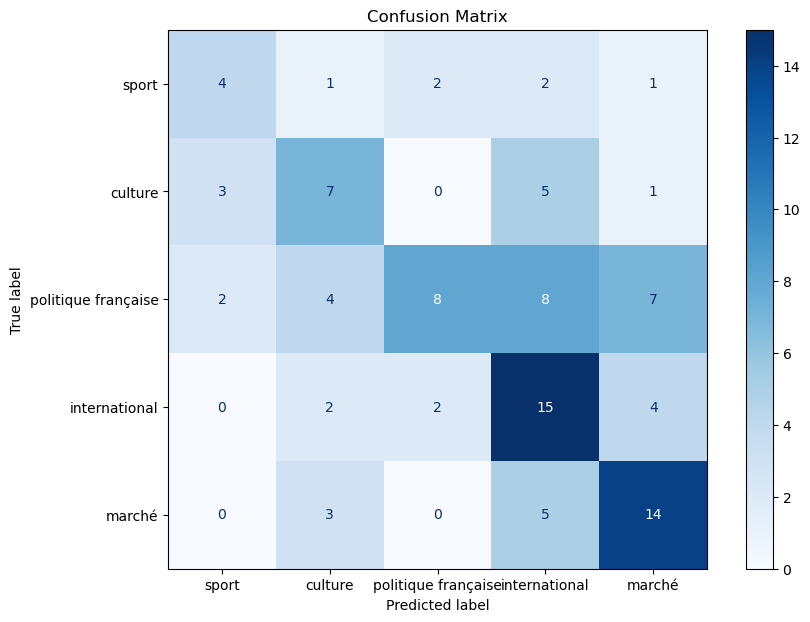

In [18]:
# report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

report = classification_report(Y_test, Y_pred, labels= list_semantic_categories, zero_division = 0)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(Y_test, Y_pred,labels = list_semantic_categories)
#print("Confusion Matrix:\n", conf_matrix)

fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list_semantic_categories)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

On voit que la prédiction n'est pas très bonne avec seulement les premiers caractères mais on pouvait s'y attendre.

### Actual code

In [19]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix

from tqdm.notebook import tqdm

tqdm.pandas(desc = "Topic article pred")

model_name = "mtheo/camembert-base-xnli"

classifier = pipeline(
    task='zero-shot-classification',
    model=model_name,
    tokenizer=model_name
)

test_set = df.sample(100, random_state=42)

X_test = test_set.text
Y_test = test_set.semantic_categories

def zero_shot_camembert(text):
    # we take the best prediction score
    return classifier(text,candidate_labels=list_semantic_categories, hypothesis_template="Cet article parle de {}.")['labels'][0]

Y_pred = X_test.progress_apply(zero_shot_camembert)

Topic article pred:   0%|          | 0/100 [00:00<?, ?it/s]

On a une exécution totale en 5 mn avec un temps moyen de 2 s par article, ce qui est pas si long mais reste beaucoup plus long que la classification naïve.

Classification Report:
                      precision    recall  f1-score   support

              sport       1.00      1.00      1.00        10
            culture       0.70      0.44      0.54        16
politique française       0.74      0.59      0.65        29
      international       0.40      0.70      0.51        23
             marché       0.47      0.36      0.41        22

           accuracy                           0.58       100
          macro avg       0.66      0.62      0.62       100
       weighted avg       0.62      0.58      0.58       100



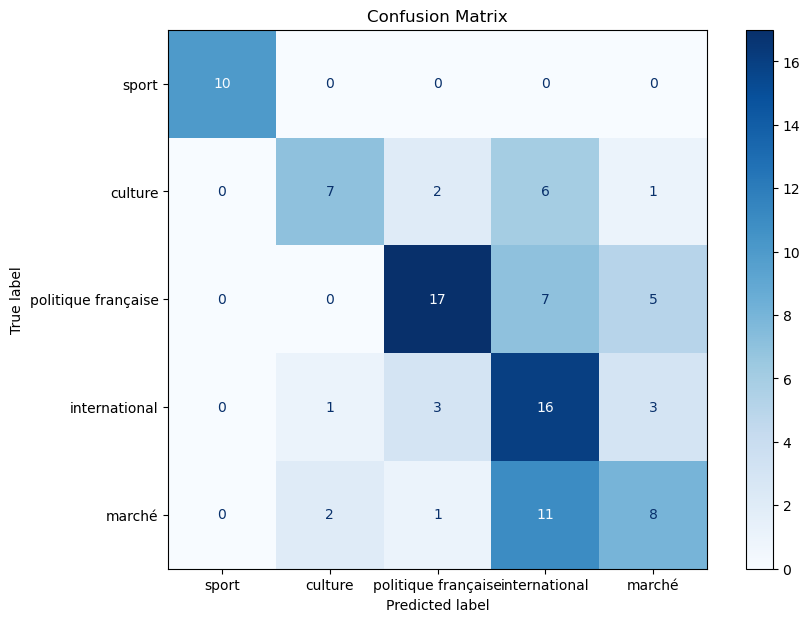

In [20]:
# report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

report = classification_report(Y_test, Y_pred, labels= list_semantic_categories, zero_division = np.nan)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(Y_test, Y_pred,labels = list_semantic_categories)
#print("Confusion Matrix:\n", conf_matrix)

fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list_semantic_categories)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

### With the Naive Bayes Classifier and a Classic Lexicographic Count:

**Classification Report:**

|          | precision | recall | f1-score | support |
|----------|-----------|--------|----------|---------|
| **ART**      | 0.83      | 0.88   | 0.86     | 457     |
| **ENT**      | 0.81      | 0.82   | 0.81     | 630     |
| **FRASOC**   | 0.76      | 0.86   | 0.81     | 718     |
| **INT**      | 0.88      | 0.82   | 0.85     | 787     |
| **SPO**      | 0.98      | 0.66   | 0.79     | 219     |
| **accuracy** |           |        | 0.83     | 2811    |
| **macro avg**| 0.85      | 0.81   | 0.82     | 2811    |
| **weighted avg**| 0.83  | 0.83   | 0.83     | 2811    |

### With the LLM CamemBERT Model:

**Classification Report:**

|                      | precision | recall | f1-score | support |
|----------------------|-----------|--------|----------|---------|
| **sport**            | 1.00      | 1.00   | 1.00     | 10      |
| **culture**          | 0.70      | 0.44   | 0.54     | 16      |
| **politique française** | 0.74      | 0.59   | 0.65     | 29      |
| **international**    | 0.40      | 0.70   | 0.51     | 23      |
| **marché**           | 0.47      | 0.36   | 0.41     | 22      |
| **accuracy**         |           |        | 0.58     | 100     |
| **macro avg**        | 0.66      | 0.62   | 0.62     | 100     |
| **weighted avg**     | 0.62      | 0.58   | 0.58     | 100     |

It seems like simply with a zero-shot approach and not fine-tuning, a large language model cannot do better than a lexicographic approach counting words occurrences to predict the thematic of *Le Monde* articles. (Apart from the sport category). Maybe better labels could have helped, but different sets of labels were tried.